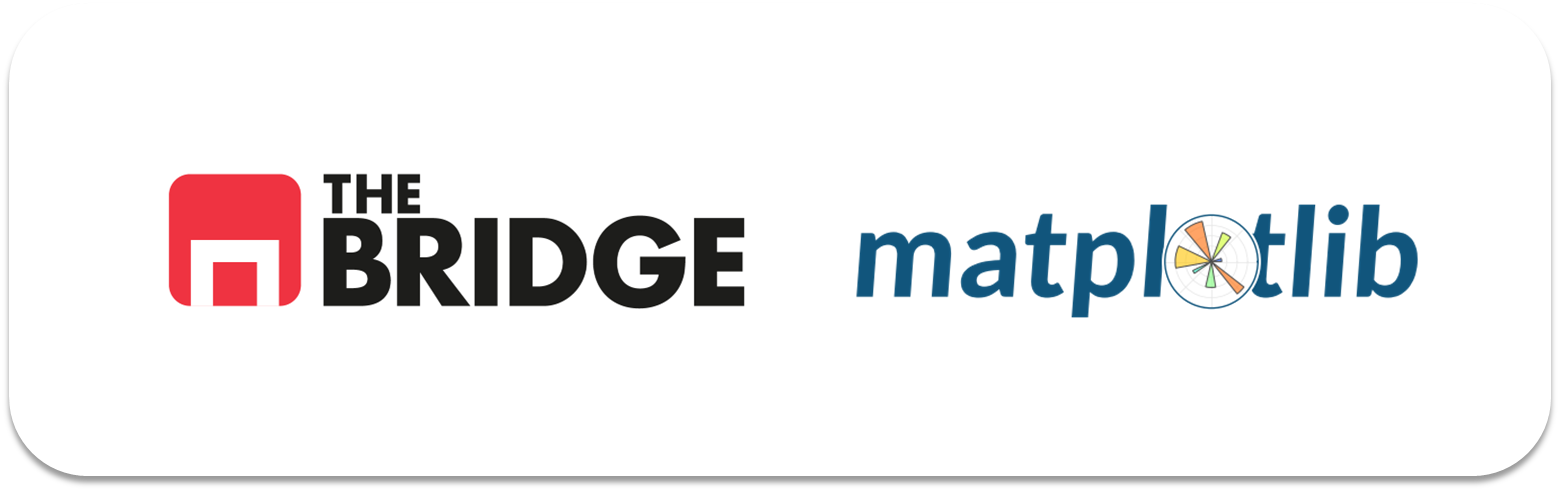

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [3]:
cities = pd.read_csv("./data/california_cities.csv")
cities.columns

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

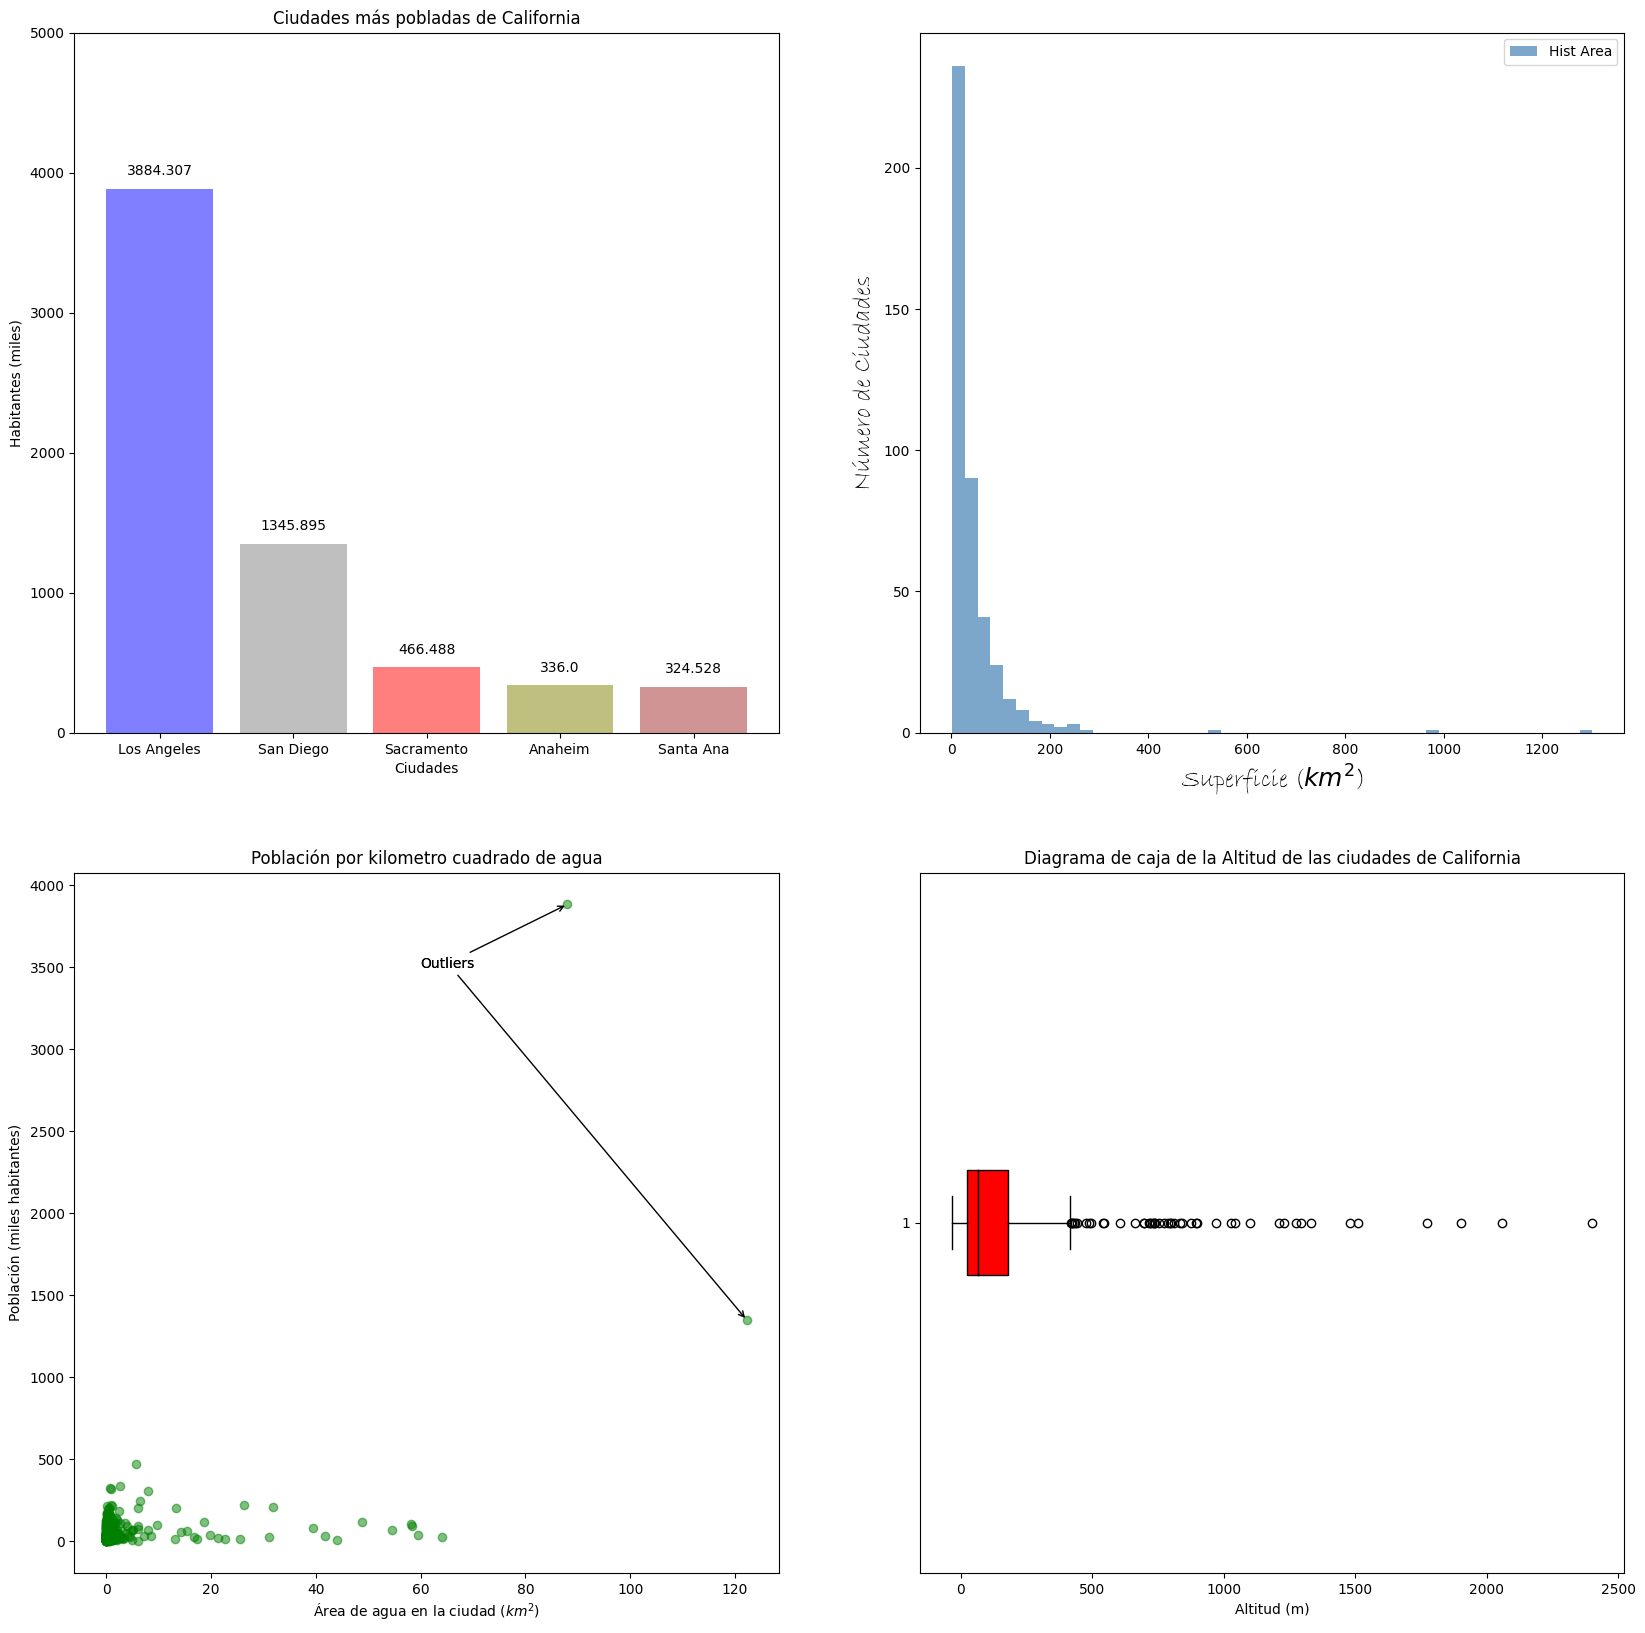

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [4]:
cities = cities.sort_values(by='population_total', ascending=False)
top_cities = cities.head(5)
top_cities


,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
239,239,LosAngeles,34.050000,-118.250000,71.0,2.0,3884307,503.000,469.000,34.000,1302.000,1214.000,88.000,6.70
367,367,SanDiego,32.715000,-117.162500,6.0,3.0,1345895,372.400,325.190,47.210,964.510,842.230,122.270,12.68
375,375,SanJose,37.333333,-121.900000,26.0,NaN,1000536,179.970,176.526,3.439,466.109,457.201,8.908,1.91
370,370,SanFrancisco,37.783333,-122.416667,NaN,52.0,837442,231.890,46.870,185.020,NaN,NaN,NaN,80.00
150,150,Fresno,36.750000,-119.766667,NaN,308.0,509039,112.308,111.957,0.351,290.877,289.967,0.910,0.31


C:\Users\joser\AppData\Local\Temp\ipykernel_18824\2620144897.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_cities['city'], rotation=45, ha='right')


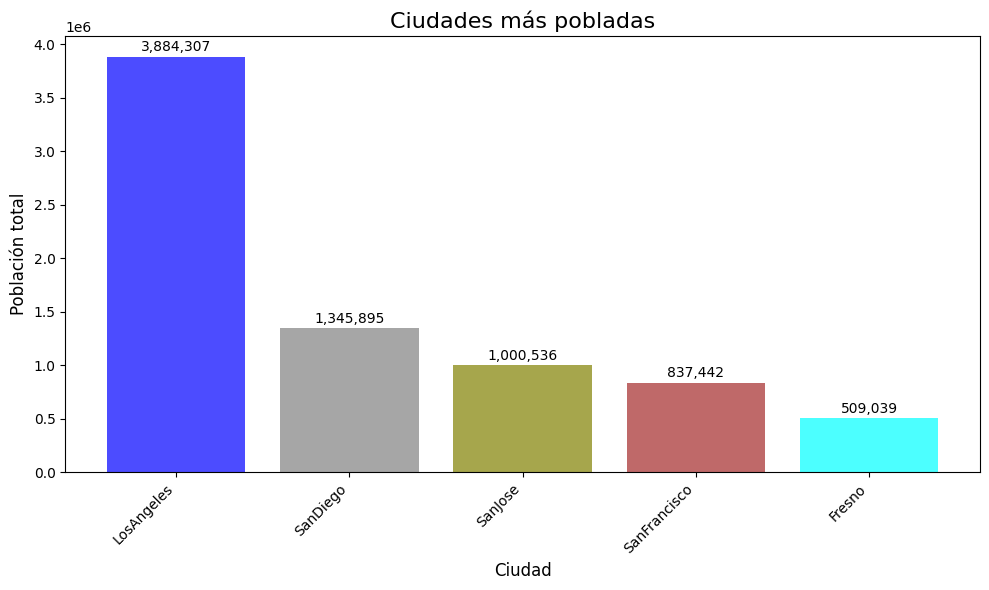

In [5]:

cities = cities.sort_values(by='population_total', ascending=False)
top_cities = cities.head(5)
top_cities


# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Colores personalizados
colors = ['blue', 'gray', 'olive', 'brown', 'cyan']  # Añadimos más colores si es necesario

# Crear el gráfico de barras
bars = ax.bar(top_cities['city'], top_cities['population_total'], color=colors, alpha=0.7)

# Agregar etiquetas de población centradas sobre las barras
for bar, population in zip(bars, top_cities['population_total']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posición centrada
        bar.get_height() + 50000,          # Un poco encima de la barra
        f'{population:,}',                 # Formato con comas
        ha='center', fontsize=10, color='black'
    )

# Configurar el título y las etiquetas de los ejes
ax.set_title('Ciudades más pobladas', fontsize=16)
ax.set_xlabel('Ciudad', fontsize=12)
ax.set_ylabel('Población total', fontsize=12)

# Rotar etiquetas del eje X para mayor legibilidad
ax.set_xticklabels(top_cities['city'], rotation=45, ha='right')

# Ajustar diseño
fig.tight_layout()

# Mostrar el gráfico
plt.show()


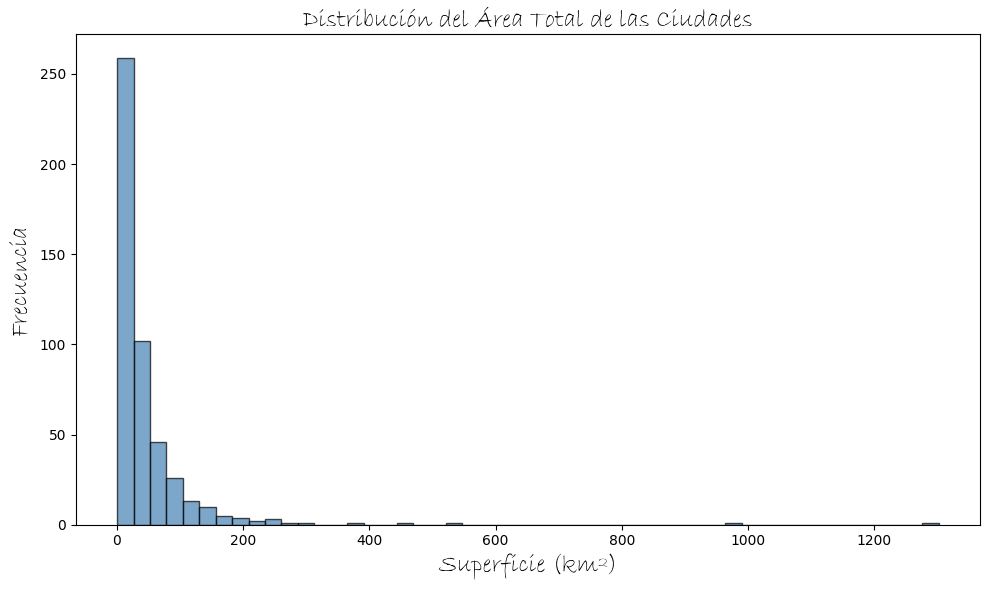

In [ ]:

# Crear el histograma
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.boxplot(cities['area_total_km2'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)

# Personalizar títulos y etiquetas con la fuente solicitada
plt.title('Distribución del Área Total de las Ciudades', fontsize=18, fontname='Bradley Hand ITC')
plt.xlabel('Superficie (km²)', fontsize=18, fontname='Bradley Hand ITC')
plt.ylabel('Frecuencia', fontsize=18, fontname='Bradley Hand ITC')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


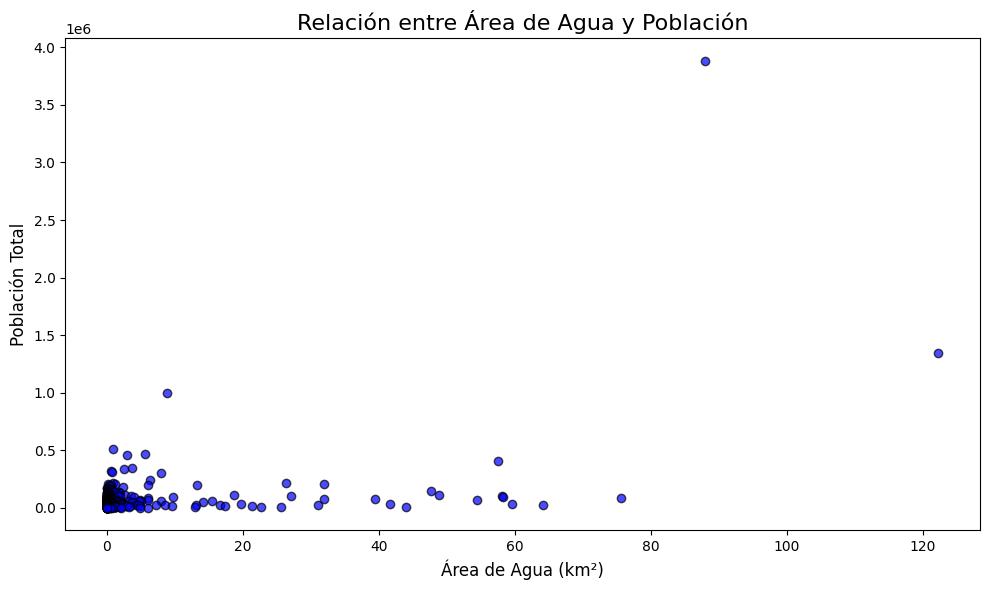

In [12]:

# Crear el scatter plot
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.scatter(cities['area_water_km2'], cities['population_total'], color='blue', alpha=0.7, edgecolor='black')

# Agregar etiquetas y título
plt.title('Relación entre Área de Agua y Población', fontsize=16)
plt.xlabel('Área de Agua (km²)', fontsize=12)
plt.ylabel('Población Total', fontsize=12)

# Anotaciones con los nombres de las ciudades
#for i, city in enumerate(cities['city']):
 #   plt.text(cities['area_water_km2'].iloc[i], cities['population_total'].iloc[i], city, fontsize=10, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show();


In [22]:
data=cities.elevation_m
data

239     71.0
367      6.0
375     26.0
370      NaN
150      NaN
       ...  
366     22.0
190     98.0
7      280.0
448     62.0
327    259.0
Name: elevation_m, Length: 482, dtype: float64

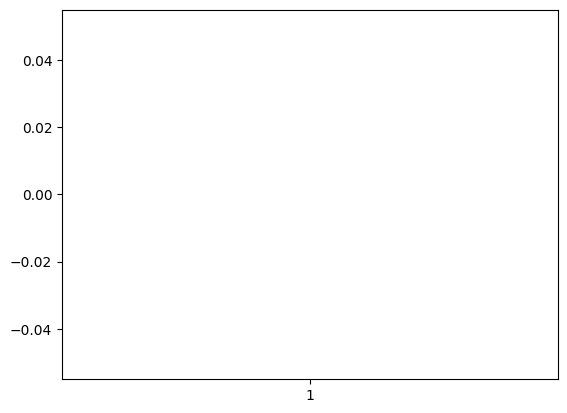

In [24]:
# Crear el boxplot
#plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.boxplot(data, patch_artist=True,whis=1.5);
# Personalizar títulos y etiquetas
#plt.title('Distribución de la Altura de las Ciudades', fontsize=16)
#plt.ylabel('Altura (m)', fontsize=12)
#plt.xticks([1], ['Ciudades'])  # Solo hay un grupo, llamado "Ciudades"

# Mostrar el gráfico
#plt.tight_layout()
#plt.show()


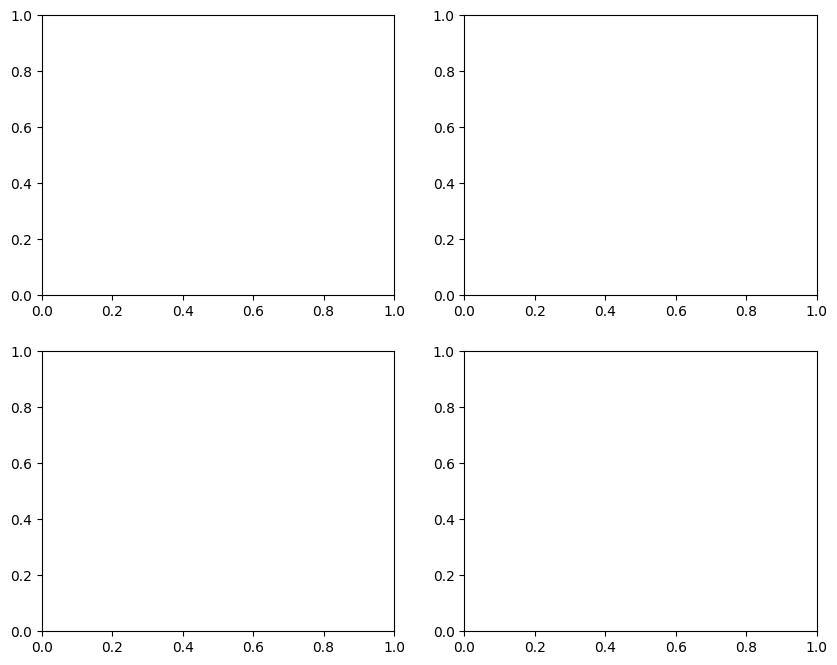

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


TypeError: 'Text' object is not callable

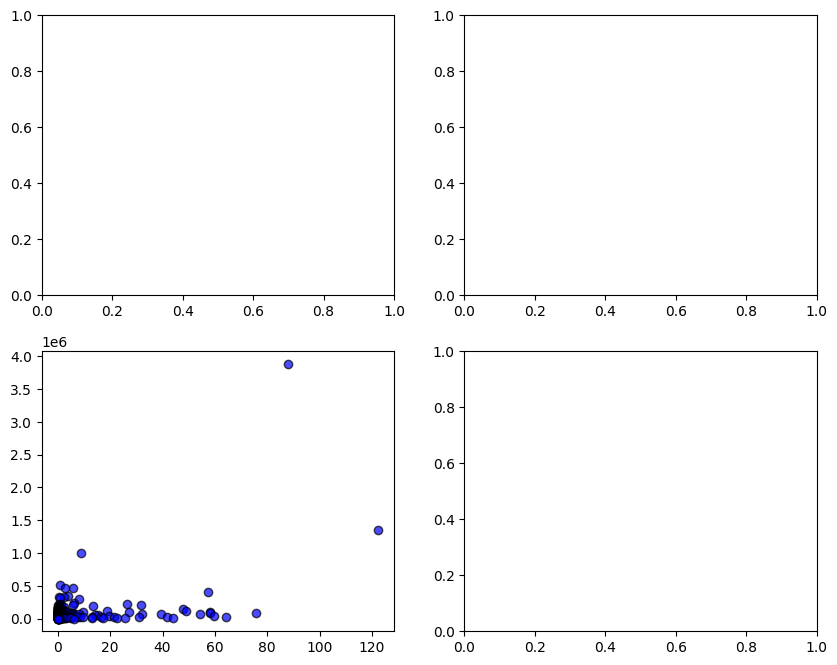

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


#ax[0,1].figure(figsize=(10, 6))  # Tamaño del gráfico
axs[1,0].scatter(cities['area_water_km2'], cities['population_total'], color='blue', alpha=0.7, edgecolor='black')

# Agregar etiquetas y título
axs[1,0].title('Relación entre Área de Agua y Población', fontsize=16)
axs[1,0].xlabel('Área de Agua (km²)', fontsize=12)
axs[1,0].ylabel('Población Total', fontsize=12)

# Anotaciones con los nombres de las ciudades
#for i, city in enumerate(cities['city']):
 #   plt.text(cities['area_water_km2'].iloc[i], cities['population_total'].iloc[i], city, fontsize=10, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show();